In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from libpysal.weights import KNN
from esda.moran import Moran

import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir("..")

cwd = os.getcwd()

In [3]:
input_folder = os.path.join(cwd, "input")

output_folder = os.path.join(cwd, "output")

figure_folder = os.path.join(cwd, "output", "figures")

In [4]:
baseline_tn = pd.read_csv(f'{output_folder}\\predictions_baseline_tn.csv')

top5_tn = pd.read_csv(f'{output_folder}\\predictions_top5_tn.csv')

coordinate_tn = pd.read_csv(f'{output_folder}\\predictions_coordinate_tn.csv')

buffer_tn = pd.read_csv(f'{output_folder}\\predictions_buffer_tn.csv')

top5_buffer_tn = pd.read_csv(f'{output_folder}\\predictions_top5_buffer_tn.csv')

In [5]:
test_points = pd.read_csv(f'{output_folder}\\baseline_tn_X_test.csv')
test_points = test_points['site_id']

baseline_tn_t = baseline_tn[baseline_tn['site_id'].isin(test_points)]

baseline_tn_t.to_csv(f'{output_folder}\\baseline_tn_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\top5_tn_X_test.csv')
test_points = test_points['site_id']

top5_tn_t = top5_tn[top5_tn['site_id'].isin(test_points)]

top5_tn_t.to_csv(f'{output_folder}\\top5_tn_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\coordinate_tn_X_test.csv')
test_points = test_points['site_id']

coordinate_tn_t = coordinate_tn[coordinate_tn['site_id'].isin(test_points)]

coordinate_tn_t.to_csv(f'{output_folder}\\coordinate_tn_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\buffer_tn_X_test.csv')
test_points = test_points['site_id']

buffer_tn_t = buffer_tn[buffer_tn['site_id'].isin(test_points)]

buffer_tn_t.to_csv(f'{output_folder}\\buffer_tn_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\top5_buffer_tn_X_test.csv')
test_points = test_points['site_id']

top5_buffer_tn_t = top5_buffer_tn[top5_buffer_tn['site_id'].isin(test_points)]

top5_buffer_tn_t.to_csv(f'{output_folder}\\top5_buffer_tn_test_pts.csv')

In [6]:
baseline_tp = pd.read_csv(f'{output_folder}\\predictions_baseline_tp.csv')

top5_tp = pd.read_csv(f'{output_folder}\\predictions_top5_tp.csv')

coordinate_tp = pd.read_csv(f'{output_folder}\\predictions_coordinate_tp.csv')

buffer_tp = pd.read_csv(f'{output_folder}\\predictions_buffer_tp.csv')

top5_buffer_tp = pd.read_csv(f'{output_folder}\\predictions_top5_buffer_tp.csv')

In [7]:
test_points = pd.read_csv(f'{output_folder}\\baseline_tp_X_test.csv')
test_points = test_points['site_id']

baseline_tp_t = baseline_tp[baseline_tp['site_id'].isin(test_points)]

baseline_tp_t.to_csv(f'{output_folder}\\baseline_tp_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\top5_tp_X_test.csv')
test_points = test_points['site_id']

top5_tp_t = top5_tp[top5_tp['site_id'].isin(test_points)]

top5_tp_t.to_csv(f'{output_folder}\\top5_tp_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\coordinate_tp_X_test.csv')
test_points = test_points['site_id']

coordinate_tp_t = coordinate_tp[coordinate_tp['site_id'].isin(test_points)]

coordinate_tp_t.to_csv(f'{output_folder}\\coordinate_tp_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\buffer_tp_X_test.csv')
test_points = test_points['site_id']

buffer_tp_t = buffer_tp[buffer_tp['site_id'].isin(test_points)]

buffer_tp_t.to_csv(f'{output_folder}\\buffer_tp_test_pts.csv')

test_points = pd.read_csv(f'{output_folder}\\top5_buffer_tp_X_test.csv')
test_points = test_points['site_id']

top5_buffer_tp_t = top5_buffer_tp[top5_buffer_tp['site_id'].isin(test_points)]

top5_buffer_tp_t.to_csv(f'{output_folder}\\top5_buffer_tp_test_pts.csv')

In [8]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plot_tone = cmap(0.0)

plot_tone_2 = cmap(1.0)

# 1. Statistics of residuals

In [9]:
nutrient = ['TN'] * 5 + ['TP'] * 5

models = ['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer',
         'Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer']

dfs = [baseline_tn_t, top5_tn_t, coordinate_tn_t, buffer_tn_t, top5_buffer_tn_t,
      baseline_tp_t, top5_tp_t, coordinate_tp_t, buffer_tp_t, top5_buffer_tp_t]

data = []

count = 0

for mod in dfs:

    df = mod['residual']

    row = [nutrient[count], models[count], round(df.min(), 2), round(df.median(), 2), round(df.mean(), 2), round(df.max(), 2), round(df.std(), 2)]
    
    data.append(row)
    
    count += 1
    
    
    
df = pd.DataFrame(data, columns = ['nutrient', 'model', 'min', 'median', 'mean', 'max', 'std'])
print(df)
print(df.to_latex())

  nutrient         model   min  median  mean   max   std
0       TN      Baseline -4.47    0.16  0.10  4.90  1.29
1       TN         Top 5 -4.21    0.15  0.04  5.14  1.30
2       TN    Coordinate -3.96    0.10  0.07  5.74  1.24
3       TN        Buffer -4.18    0.10  0.11  7.25  1.35
4       TN  Top 5 buffer -4.20    0.10  0.08  4.53  1.25
5       TP      Baseline -0.59    0.01  0.01  0.30  0.08
6       TP         Top 5 -0.61    0.01  0.01  0.32  0.08
7       TP    Coordinate -0.62    0.01  0.01  0.32  0.08
8       TP        Buffer -0.69    0.01  0.01  0.31  0.08
9       TP  Top 5 buffer -0.69    0.01  0.01  0.33  0.08
\begin{tabular}{lllrrrrr}
\toprule
 & nutrient & model & min & median & mean & max & std \\
\midrule
0 & TN & Baseline & -4.470000 & 0.160000 & 0.100000 & 4.900000 & 1.290000 \\
1 & TN & Top 5 & -4.210000 & 0.150000 & 0.040000 & 5.140000 & 1.300000 \\
2 & TN & Coordinate & -3.960000 & 0.100000 & 0.070000 & 5.740000 & 1.240000 \\
3 & TN & Buffer & -4.180000 & 0.100000 & 0

## 2. Spatial autocorrelation of the residuals (Moran's I)

In [10]:
# Moran's I for observations

In [11]:
coords = baseline_tn[['Y', 'X']].values 
residuals = baseline_tn['obs'].values 

# Create spatial weights matrix
w = KNN.from_array(coords, k=5)
w.transform = 'R'  # Row-standardization (recommended for Moran's I)

# Step 3: Compute Moran's I 
moran = Moran(residuals, w)


print(f"Moran's I: {moran.I:.4f}")
print(f"Expected I (under null): {moran.EI:.4f}")
print(f"p-value (permutation test): {moran.p_sim:.4f}")

Moran's I: 0.7337
Expected I (under null): -0.0011
p-value (permutation test): 0.0010


In [12]:
models = ['baseline', 'top5', 'coordinate', 'buffer', 'top5_buffer']

count = 0

for df in baseline_tn_t, top5_tn_t, coordinate_tn_t, buffer_tn_t, top5_buffer_tn_t:
    
    # Step 1: Extract coordinates and residuals
    coords = df[['Y', 'X']].values 
    residuals = df['residual'].values
    
    # Step 2: Create spatial weights matrix
    w = KNN.from_array(coords, k=5)
    w.transform = 'R'  # Row-standardization (recommended for Moran's I)

    # Step 3: Compute Moran's I
    moran = Moran(residuals, w)
    print(f'TN model {models[count]}')
    print(f"Moran's I: {moran.I:.4f}")
    print(f"Expected I (under null): {moran.EI:.4f}")
    print(f"p-value (permutation test): {moran.p_sim:.4f}")
    print('')

    count+=1

TN model baseline
Moran's I: 0.1485
Expected I (under null): -0.0037
p-value (permutation test): 0.0010

TN model top5
Moran's I: 0.1530
Expected I (under null): -0.0037
p-value (permutation test): 0.0010

TN model coordinate
Moran's I: 0.1207
Expected I (under null): -0.0037
p-value (permutation test): 0.0030

TN model buffer
Moran's I: 0.1747
Expected I (under null): -0.0038
p-value (permutation test): 0.0010

TN model top5_buffer
Moran's I: 0.1647
Expected I (under null): -0.0038
p-value (permutation test): 0.0010



In [13]:
#Moran's I for observations

In [14]:
coords = baseline_tp[['Y', 'X']].values 
residuals = baseline_tp['obs'].values 

# Create spatial weights matrix 
w = KNN.from_array(coords, k=5)
w.transform = 'R' 

# Step 3: Compute Moran's I 
moran = Moran(residuals, w)


print(f"Moran's I: {moran.I:.4f}")
print(f"Expected I (under null): {moran.EI:.4f}")
print(f"p-value (permutation test): {moran.p_sim:.4f}")

Moran's I: 0.2014
Expected I (under null): -0.0011
p-value (permutation test): 0.0010


In [15]:
models = ['baseline', 'top 5', 'coordinate', 'buffer', 'top5_buffer']

count = 0

for df in baseline_tp_t, top5_tp_t, coordinate_tp_t, buffer_tp_t, top5_buffer_tp_t:
    
    # Step 1: Extract coordinates and residuals
    coords = df[['Y', 'X']].values 
    residuals = df['residual'].values
    
    # Step 2: Create spatial weights matrix
    w = KNN.from_array(coords, k=5)
    w.transform = 'R'  # Row-standardization (recommended for Moran's I)

    # Step 3: Compute Moran's I
    moran = Moran(residuals, w)
    print(f'TP model {models[count]}')
    print(f"Moran's I: {moran.I:.4f}")
    print(f"Expected I (under null): {moran.EI:.4f}")
    print(f"p-value (permutation test): {moran.p_sim:.4f}")
    print('')

    count+=1

TP model baseline
Moran's I: -0.0054
Expected I (under null): -0.0037
p-value (permutation test): 0.4850

TP model top 5
Moran's I: -0.0219
Expected I (under null): -0.0037
p-value (permutation test): 0.2870

TP model coordinate
Moran's I: 0.0215
Expected I (under null): -0.0037
p-value (permutation test): 0.2040

TP model buffer
Moran's I: 0.0085
Expected I (under null): -0.0038
p-value (permutation test): 0.3230

TP model top5_buffer
Moran's I: 0.0144
Expected I (under null): -0.0038
p-value (permutation test): 0.2820



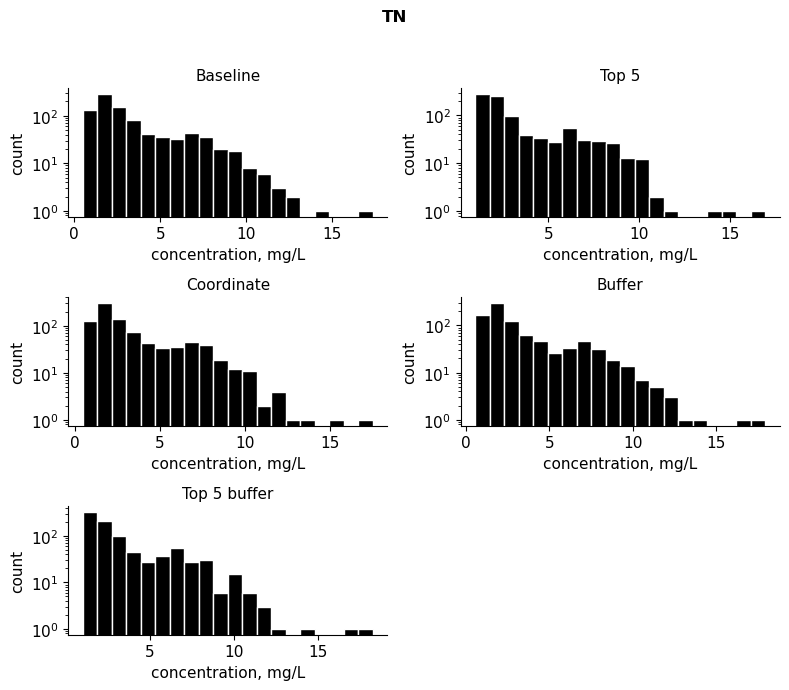

In [16]:
column_name = 'pred'
num_bins = 20  

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(8, 7))
axes_list = axes.flatten()

dataframes = [baseline_tn, top5_tn, coordinate_tn, buffer_tn, top5_buffer_tn]
titles = ['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer']

# Plot histograms
for ax, df, title in zip(axes_list, dataframes, titles):
    # Calculate bins automatically based on min/max of the data
    bins = np.linspace(df[column_name].min(), df[column_name].max(), num_bins + 1)
    ax.hist(df[column_name], bins=bins, color= 'black', edgecolor='white')
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('concentration, mg/L', fontsize=11)
    ax.set_ylabel('count', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yscale('log')
    
# Hide the empty subplot (6th one)
if len(dataframes) < len(axes_list):
    for ax in axes_list[len(dataframes):]:
        ax.axis('off')

# Main figure title
fig.suptitle('TN', fontsize=12, fontweight="bold")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig(f'{figure_folder}\\Figure_S8a.pdf', dpi=500)

# Show plot
plt.show()

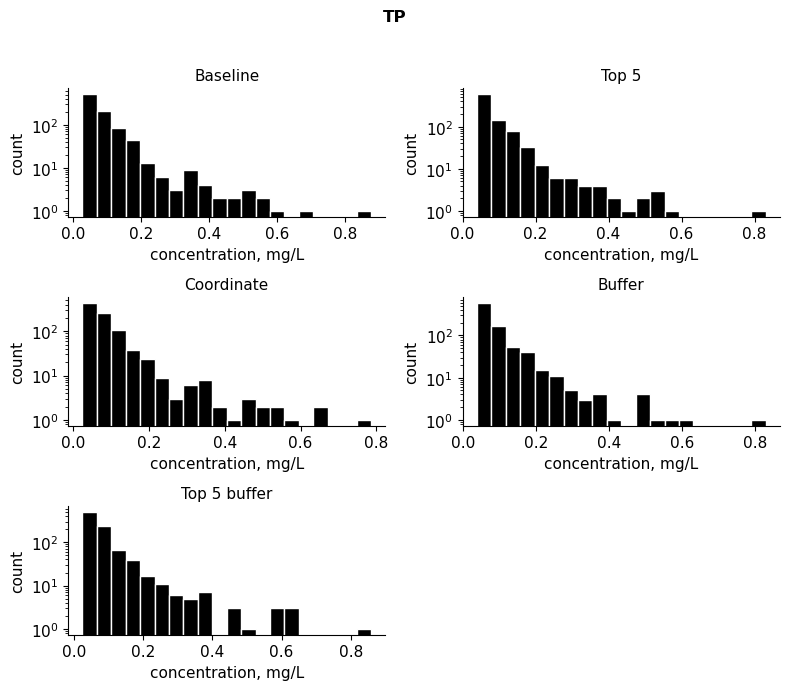

In [17]:
column_name = 'pred'
num_bins = 20  # number of bins

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(8, 7))
axes_list = axes.flatten()

dataframes = [baseline_tp, top5_tp, coordinate_tp, buffer_tp, top5_buffer_tp]
titles = ['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer']

# Plot histograms
for ax, df, title in zip(axes_list, dataframes, titles):
    # Calculate bins automatically based on min/max of the data
    bins = np.linspace(df[column_name].min(), df[column_name].max(), num_bins + 1)
    ax.hist(df[column_name], bins=bins, color= 'black', edgecolor='white')
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('concentration, mg/L', fontsize=11)
    ax.set_ylabel('count', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yscale('log')
    
# Hide the empty subplot (6th one)
if len(dataframes) < len(axes_list):
    for ax in axes_list[len(dataframes):]:
        ax.axis('off')

# Main figure title
fig.suptitle('TP', fontsize=12,fontweight="bold")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig(f'{figure_folder}\\Figure_S8b.pdf', dpi=500)

# Show plot
plt.show()

In [18]:
def plot_regressions(dfs, main_title, titles=None):
    """
    dfs: list of 5 pandas DataFrames, each with columns ['x', 'y']
    titles: optional list of subplot titles (length 5)
    """
    fig, axes = plt.subplots(2, 3, figsize=(8, 4.3), sharex=True, sharey=True)
    axes = axes.flatten()
    
    if titles is None:
        titles = [f"Dataset {i+1}" for i in range(len(dfs))]
    
    for ax, df, title in zip(axes, dfs, titles):
        X = df["obs"].values.reshape(-1, 1)
        y = df["pred"].values
        
        # Fit regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Scatter plot
        ax.scatter(X, y, alpha=0.7, color = plot_tone, s=5)
        
        # Regression line
        ax.plot(X, y_pred, color=plot_tone_2, linewidth=1)
        
        # Title for subplot
        ax.set_title(title, fontsize=11)
        
        # Subplot title
        ax.set_title(title, fontsize=11)
        ax.set_xlabel('observed', size=11)
        ax.set_ylabel('predicted', size=11)
        ax.tick_params(axis='both', labelsize=11)
        
    fig.suptitle(main_title, fontweight="bold", fontsize=13)
    # Hide the last subplot (6th empty one)
    fig.delaxes(axes[-1])
    
    plt.tight_layout(rect=[0, 0, 1, 1])
    
    if main_title == 'TN':
        
        figname = 'S9a'
        
    else:
        
        figname = 'S9b'
        
    plt.savefig(f'{figure_folder}\\Figure_{figname}.pdf', dpi=500)        
        
    
    plt.show()


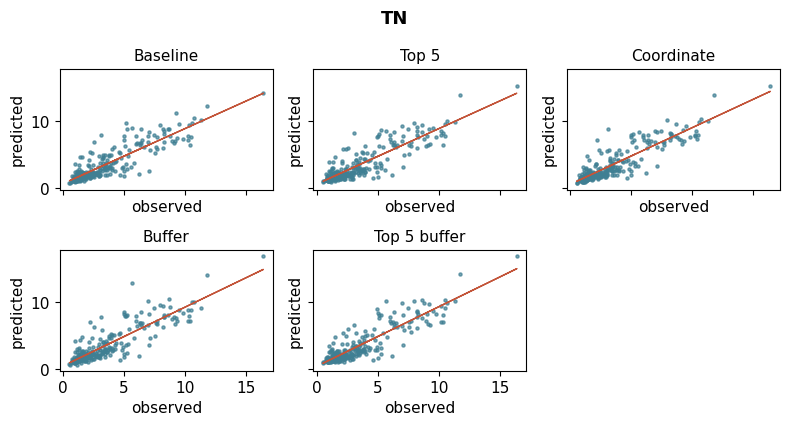

In [19]:
plot_regressions([baseline_tn_t, top5_tn_t, coordinate_tn_t, buffer_tn_t, top5_buffer_tn_t], 'TN', titles=['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer'])

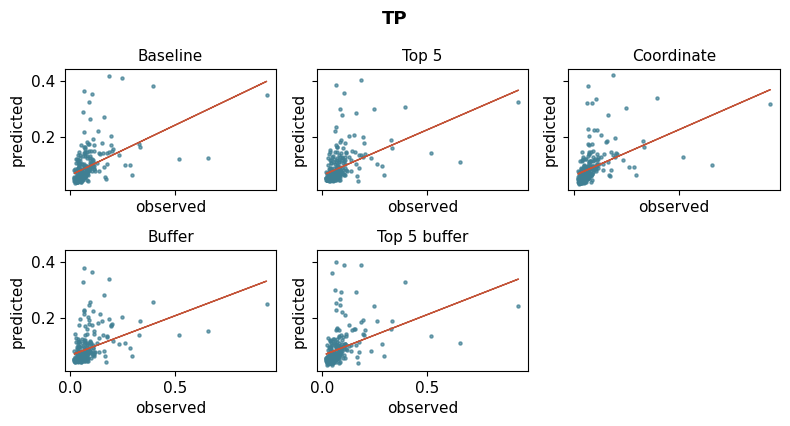

In [20]:
plot_regressions([baseline_tp_t, top5_tp_t, coordinate_tp_t, buffer_tp_t, top5_buffer_tp_t], 'TP', titles=['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer'])

In [21]:
def plot_conc_and_res(dfs, main_title, titles=None):
    """
    dfs: list of 5 pandas DataFrames, each with columns ['x', 'y']
    titles: optional list of subplot titles (length 5)
    """
    fig, axes = plt.subplots(2, 3, figsize=(8, 4.3), sharex=True, sharey=True)
    axes = axes.flatten()
    
    if titles is None:
        titles = [f"Dataset {i+1}" for i in range(len(dfs))]
    
    for ax, df, title in zip(axes, dfs, titles):
        X = df["obs"].values.reshape(-1, 1)
        y = df["residual"].values
        
        # Fit regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Scatter plot
        ax.scatter(X, y, alpha=0.7, color = plot_tone, s=5)
        
        # Regression line
        ax.plot(X, y_pred, linewidth=1, color = plot_tone_2)
        
        # Title for subplot
        ax.set_title(title, fontsize=13)
        
        # Subplot title
        ax.set_title(title, fontsize=11)
        ax.set_xlabel('observed', size=11)
        ax.set_ylabel('abs % residuals', size=11)
        ax.tick_params(axis='both', labelsize=11)
    
    fig.suptitle(main_title, fontsize=13, fontweight="bold")
    # Hide the last subplot (6th empty one)
    fig.delaxes(axes[-1])
    
    
    
    plt.tight_layout(rect=[0, 0, 1, 1])
    
    
    if main_title == 'TN':
        
        figname = 'S10a'
        
    else:
        
        figname = 'S10b'
        
    plt.savefig(f'{figure_folder}\\Figure_{figname}.pdf', dpi=500)       
    
    
    plt.show()

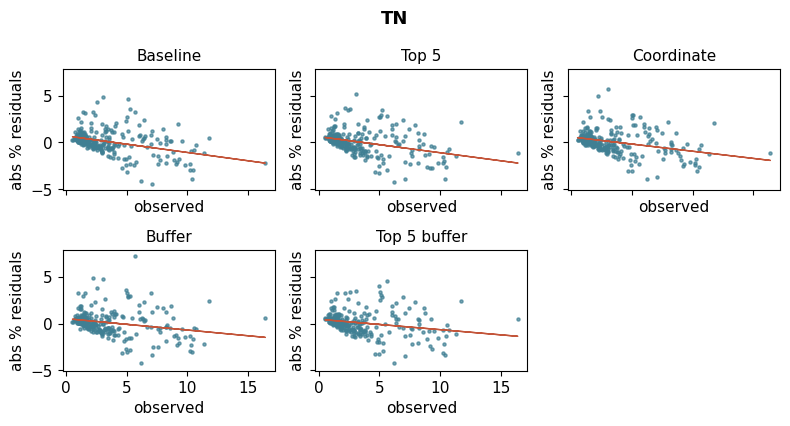

In [22]:
plot_conc_and_res([baseline_tn_t, top5_tn_t, coordinate_tn_t, buffer_tn_t, top5_buffer_tn_t], 'TN', titles=['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer'])

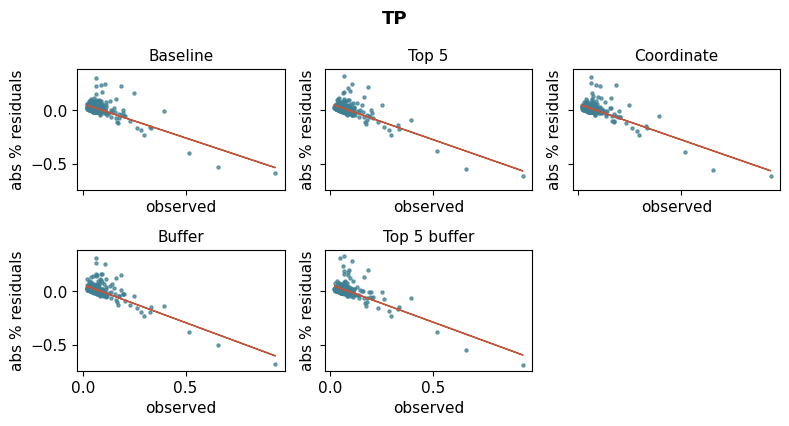

In [23]:
plot_conc_and_res([baseline_tp_t, top5_tp_t, coordinate_tp_t, buffer_tp_t, top5_buffer_tp_t], 'TP', titles=['Baseline', 'Top 5', 'Coordinate', 'Buffer', 'Top 5 buffer'])